# Machine Learning 101 Hands On Workshop

In [1]:
# Get the data:
#  This will pull the required data (train.csv and test.csv files) from dropbox.
#  The cool thing is that this is leveraging wget on the docker container to pull data to your local disk,
#  consistently for all operating systems.
! rm -f train.csv test.csv
! wget https://www.dropbox.com/s/f7fb3gon8byyyz6/train.csv?dl=1 -O train.csv -q
! wget https://www.dropbox.com/s/zcd2751x6waex9f/test.csv?dl=1 -O test.csv -q
! ls -l train.csv test.csv
! wc -l train.csv test.csv

-rw-r--r-- 1 root root 28629 Mar  2 21:05 test.csv
-rw-r--r-- 1 root root 61194 Mar  2 21:05 train.csv
  892 train.csv
  419 test.csv
 1311 total



<div class="panel-group" id="accordion-1">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-1" href="#collapse1-1">Introduction / Motivation</a>
    </h4>
    </div>
    <div id="collapse1-1" class="panel-collapse collapse">
      <div class="panel-body">
      <h3 class="panel-title">Why are you here?</h3>
      <img src='images/sexiest_job.png' style="width: 500px;" align="right"/>
      <ul>
          <li>Want to check out this whole "**Data Science - Sexiest Job of the 21st Century**" thing.</li>
          <li>Free pizza?</li>
          <li>Have been dabbling/reading, but are struggling to go through a **data science problem start to finish**.</li>
          <li>Have been using XYZ (R, SAS, Matlab, Octave, etc.) toolset, but would like to **check out Python as an alternative**.</li>
          <li>Others?</li>
      </ul>
      <h3>Motivation for doing this workshop</h3>
      <ul>
          <li>Attended many meetups talking through interesting but potentially intractible problems for a beginner.</li>
          <li>Saw many developers / analysts who wanted to move deeper into DS, but struggling to find good local content. </li>
          <li>Wanted to see more hands-on approach (walk out and feel you can start writing code or at least have a starting point).</li>
      </ul>
    </div>
    </div>
</div>
<div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-1" href="#collapse2-1">Environment Details</a>
    </h4>
    </div>
    <div id="collapse2-1" class="panel-collapse collapse">
      <div class="panel-body">
      <img src='images/docker_icon.png' style="width: 100px;" align="right"/>
      <ul>
          <li>Docker</li>
          <ul type="circle">
              <li>Isolation, consistency</li>
              <li>Includes installation of Python 3.6.3</li>
              <li>Additional modules: jupyter, numpy, pandas, matplotlib, sklearn, seaborn</li>
          </ul>
       </ul>
       <img src='images/jupyter_icon.png' style="width: 100px;" align="right"/>
       <ul>
           <li>Jupyter notebook:</li>
           <ul type="circle">
             <li>Quick feedback loop</li>
             <li>Writeup and code co-located (like R-Markdown files, but simpler)</li>
             <li>Easy interface</li>
           </ul>
       </ul>
       <ul>
           <li>Quick overview of getting this environment running:</li>
           <ul>
               <li>Install docker</li>
               <li>Download docker image:
  
    `docker login -u <USERNAME>`

    `docker pull hanfordj/ds_jupyter_launcher`
</li>
               <li>Run docker image:
  
    `docker run -d --name ds_jupyter_1 -P -v ~/docker/mnt:/ds hanfordj/ds_jupyter_launcher`
</li>
               <li>Access Jupyter Notebook at: `http://localhost:XXXX` (where XXXX = mapped port id)</li>
            </ul>
       </ul>
      </div>
    </div>
</div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-1" href="#collapse3-1">Real World ML Pipeline</a>
    </h4>
    </div>
    <div id="collapse3-1" class="panel-collapse collapse">
      <div class="panel-body">
Involves a number of complicated steps, we'll just be focusing on the preprocessing and modeling steps highlighted below:
    <br>
    <ul>
        <li>Understanding of business problem</li>
        <li>Problem formalization</li>
        <li>Data collection</li>
        <li>**Data preprocessing / cleansing**</li>
        <li>**Modelling**</li>
        <li>Way to evaluate model in real life</li>
        <li>Model deployment</li>
        <li>Model monitoring and retuning</li>
    </ul>
      </div>
    </div>
</div>
</div> 

### Process we'll be following:
1. Read data
1. Exploratory analysis of data
1. Feature engineering
1. Model Creation
1. Cross validation
1. Grid Search to find Optimal Model Parameters
1. Model Evaluation
1. Kaggle Submission
1. Interpretation of the results

### Problem Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing _1502_ out of _2224_ passengers and crew (67.54 % died). This sensational tragedy shocked the international community and led to better safety regulations for ships.

<img src='images/sunken-titanic.jpeg' style="width: 500px;"/>

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this problem, we:
* Analyze the sorts of people that were likely to survive.
* Apply the tools of machine learning to predict which passengers survived the tragedy (classification problem).

### 2-Min overview of the Problem:
* Go here for details: https://www.kaggle.com/c/titanic
* Evaluation metric: Accuracy -- % of passengers you correctly predict.
* Submission file format: ! head -10 gender_submission.csv
* Data:
  - train.csv = Training data (incl target variable)
  - test.csv = Testing data (excl target variable)
* Data dictionary:
  <img src='images/data_dictionary.png' style="width: 800px;"/>
* Variable notes:
  <img src='images/variable_notes.png' style="width: 800px;"/>

In [2]:
# Import the main Python libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, Imputer, MinMaxScaler, Normalizer, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, matthews_corrcoef

In [3]:
# Take a quick look at the top of the files to check what data we're getting as input:
! head -3 train.csv test.csv

==> train.csv <==




==> test.csv <==





### Exercise #1:
<span style="color:blue">
Here we'd like to read data from the CSV files into Panda's DataFrame objects.
* Please read "train.csv" into a DataFrame named as "df".
* Please read "test.csv" into a DataFrame named as "df_test".
</span>
<div class="panel-group" id="accordion-2">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-2" href="#collapse1-2">Hints</a>
    </h4>
    </div>
    <div id="collapse1-2" class="panel-collapse collapse">
      <div class="panel-body">
Use the function: `pd.read_csv(...)`
<br><br>
To get additional information about a function within Jupyter, open a new cell (ESC + B), type: `<fxn_name>?` and run the cell, so for example in this case:
<br>
Type: `pd.read_csv?`
    </div>
    </div>
</div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-2" href="#collapse2-2">Solution</a>
    </h4>
    </div>
    <div id="collapse2-2" class="panel-collapse collapse">
      <div class="panel-body">
One possible solution is:
<br>
`df = pd.read_csv('train.csv')`
<br>
`df_test = pd.read_csv('test.csv')`
<br>
The solution is so simple in this case as the fields have comma delimiters and double quote qualifiers (the default), but in some cases additional parameters will be needed to read data into a DataFrame.
      </div>
    </div>
</div>
</div> 

In [4]:
# Read data in from input CSV files (Exercise #1):
df = pd.read_csv('train.csv', index_col='PassengerId')
df_test = pd.read_csv('test.csv', index_col='PassengerId')

In [6]:
# Look at top 5 rows from each DataFrame (using head function):
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Exercise #2:
<span style="color:blue">
Here we'd like to inspect the data that's been read in, check:
* Column data types
* Number of rows within each data frame
* Whether there are NULLs present (missing values) in the data
</span>
<div class="panel-group" id="accordion-3">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-2" href="#collapse1-3">Hints</a>
    </h4>
    </div>
    <div id="collapse1-3" class="panel-collapse collapse">
      <div class="panel-body">
Try the functions: `__dataFrame__.info()` and `__dataFrame__.describe()`
<br>
you could also try using some of the other functions:
<ul>
  <li>Python's `len()` function to calculate the length of the data frame.</li>
  <li>Panda's `__dataFrame__.shape` attribute to see the dimensionality of the data frame.</li>
  <li>Panda's `__dataFrame__.isnull()` function to determine the null's within a data frame.</li>
</ul>
    </div>
    </div>
</div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-3" href="#collapse2-3">Solution</a>
    </h4>
    </div>
    <div id="collapse2-3" class="panel-collapse collapse">
      <div class="panel-body">
One possible solution is:
<br>
`df_to_inspect = df` # Can switch to "df_test" too...
<br><br>
`print(df_to_inspect.info())`<br>
`print()`<br>
`print(df_to_inspect.describe())`<br>
`print()`<br>
`print("Length of DataFrame is: {}".format(len(df_to_inspect)))`<br>
`print("Shape of DataFrame is: {}".format(df_to_inspect.shape))`<br>
`print("\nNULL counts per column within DataFrame are given below: \n\n{}".format(df_to_inspect.isnull().sum()))`
      </div>
    </div>
</div>
</div>

In [8]:
# Investigate the data we just read in (Exercise #2):

def view_df_info(df_to_inspect):
    print(df_to_inspect.info())
    print()
    print(df_to_inspect.describe())
    print()
    print("Length of DataFrame is: {}".format(len(df_to_inspect)))
    print("Shape of DataFrame is: {}".format(df_to_inspect.shape))
    print("\nNULL counts per column within DataFrame are given below: \n\n{}".format(df_to_inspect.isnull().sum()))

view_df_info(df)

view_df_info(df_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     

In [9]:
# Create a combined data frame for exploration and data cleansing:
combined_df = pd.concat([df,df_test], ignore_index=True)
print( "Shape: {}".format( combined_df.shape ) )
print( "Training: {}".format( combined_df[combined_df.Survived.notnull()].shape ) )
print( "Submission Test: {}".format( combined_df[combined_df.Survived.isnull()].shape ) )

Shape: (1309, 11)
Training: (891, 11)
Submission Test: (418, 11)


In [10]:
# Counts of null values for Train / Test:
combined_df.isnull().applymap(int).rename({'Survived':'Test Set'},axis=1).groupby('Test Set').sum()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
Test Set,,,,,,,,,,
0,177,687,2,0,0,0,0,0,0,0
1,86,327,0,1,0,0,0,0,0,0


Some discussion points:
* _Does it make sense to analyze the data as a combined dataframe (train + test)?_
* _Why do we care about missing values?_

### Exploration of important variables

#### Survival (Target variable):
Survival rate in the training dataset is at approximately 38.4% (for the 891 people on the Training Set). The Survival of the Test set is what we're trying to predict. 

### Exercise #3:
<span style="color:blue">
Here we'd like to use the training data "df" DataFrame to calculate the "survival rate"; this can be calculated as:
* 100.0 * {number of rows where Survived == 1} / {total number of rows}
* Round the result off to one decimal place
</span>
<div class="panel-group" id="accordion-4">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-4" href="#collapse1-4">Hints</a>
    </h4>
    </div>
    <div id="collapse1-4" class="panel-collapse collapse">
      <div class="panel-body">
You can access the values of a column from the dataframe using two approaches:
<ul>
    <li>__dataFrame__.__columnName__       e.g. df.Survived</li>
    <li>__dataFrame__['__columnName__']    e.g. df['Survived']</li>
</ul>
Checking such a column using relational operators: ==, !=, &lt;, &gt;, etc. will return a boolean Pandas Series, stating for each row the evaluation of the operation.
<br><br>
E.g. df.Survived == 1 will return [True, False, ..., True].
<br><br>
One can apply aggregation functions to such a boolean Series to get summary statistics back regarding the array:
<br>
<ul>
    <li>__series__.sum()    --> returns sum of elements, True = 1, False = 0</li>
    <li>__series__.count()  --> returns count of elements</li>
    <li>__series__.max()    --> returns max value from series</li>
    <li>__series__.min()    --> returns min value from series</li>
    <li>__series__.mean()   --> returns mean calculated from series</li>
</ul>
    </div>
    </div>
</div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-4" href="#collapse2-4">Solution</a>
    </h4>
    </div>
    <div id="collapse2-4" class="panel-collapse collapse">
      <div class="panel-body">
Some possible solutions:
<br>
<ul>
    <li>number_of_rows_where_survived_eq_1 = (df.Survived == 1).sum()</li>
    <li>number_of_rows_where_survived_eq_1 = (df.Survived > 0).sum()</li>
</ul>
<ul>
    <li>total_num_rows = len(df)</li>
    <li>total_num_rows = df.shape[0]</li>
    <li>total_num_rows = df.Survived.count()</li>
</ul>
And maybe a simpler way:
`rate = round(100.0*(df.Survived == 1).mean(),1)`
      </div>
    </div>
</div>
</div>

In [11]:
number_of_rows_where_survived_eq_1 = (df.Survived == 1).sum()
print(number_of_rows_where_survived_eq_1)

total_num_rows = len(df)
print(total_num_rows)

rate = round(100.0*number_of_rows_where_survived_eq_1/total_num_rows,1)

342
891


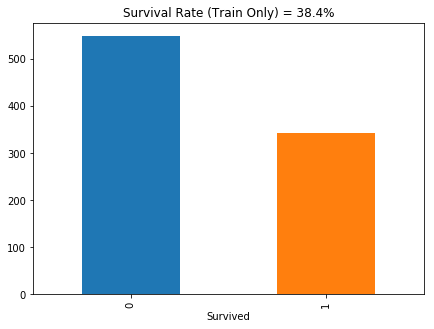

In [12]:
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
data = df.groupby(['Survived']).size()
data.plot(kind='bar',title='Survival Rate (Train Only) = {}%'.format(rate),ax=ax1);

#### Gender (Sex):
* Gender distribution consistent between train and test sets (no sampling bias).
* Female survival rate significantly higher than for males.

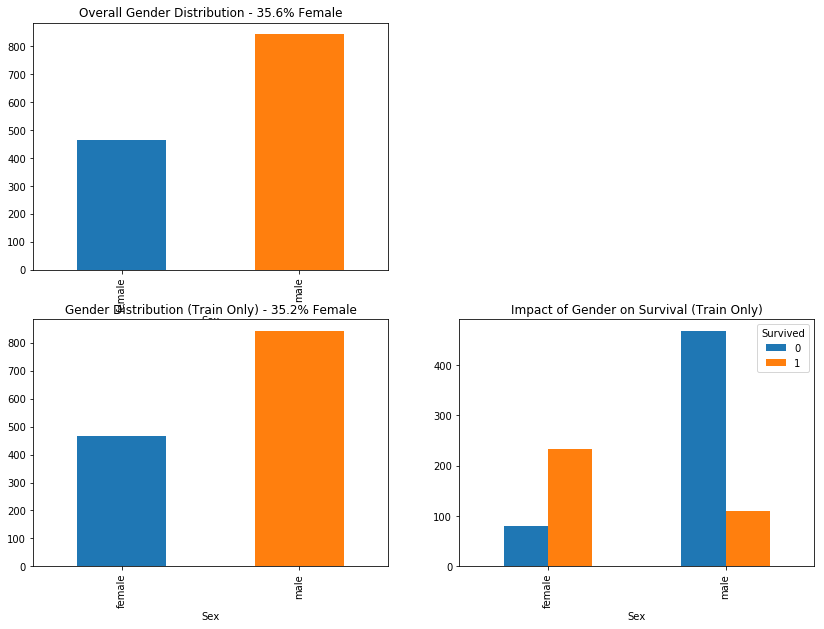

In [13]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
rate_female = round(100.0*(combined_df.Sex=='female').sum()/combined_df.Sex.count(),1)
data = combined_df.groupby(['Sex']).size()
data.plot(kind='bar',title='Overall Gender Distribution - {}% Female'.format(rate_female),ax=ax1);

ax3 = fig.add_subplot(2,2,3)
rate_female = round(100.0*(df.Sex=='female').sum()/df.Sex.count(),1)
data = combined_df.groupby(['Sex']).size()
data.plot(kind='bar',title='Gender Distribution (Train Only) - {}% Female'.format(rate_female),ax=ax3);

ax4 = fig.add_subplot(2,2,4)
data = df.groupby(['Sex', 'Survived']).size()
data.unstack().plot(kind='bar',title='Impact of Gender on Survival (Train Only)',ax=ax4);

#### Passenger Class (Pclass):
* Passenger Class distribution consistent between train and test sets (no sampling bias).
* Survival rates by Pclass:
  - 1: good survival rate (approx. 2-to-1 odds of surviving)
  - 2: flip of a coin
  - 3: really poor survival rate (approx. 1-in-4 survived)

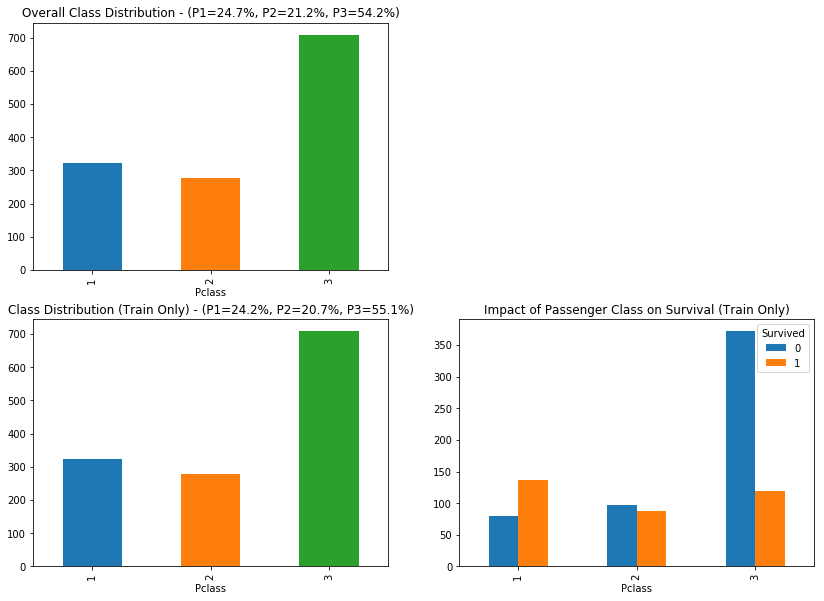

In [14]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
(rate_P1,rate_P2,rate_P3) = (round(100.0*(combined_df.Pclass==1).sum()/combined_df.Pclass.count(),1),
                             round(100.0*(combined_df.Pclass==2).sum()/combined_df.Pclass.count(),1),
                             round(100.0*(combined_df.Pclass==3).sum()/combined_df.Pclass.count(),1))
data = combined_df.groupby(['Pclass']).size()
data.plot(kind='bar',title='Overall Class Distribution - (P1={}%, P2={}%, P3={}%)'.format(rate_P1,rate_P2,rate_P3),ax=ax1);

ax3 = fig.add_subplot(2,2,3)
(rate_P1,rate_P2,rate_P3) = (round(100.0*(df.Pclass==1).sum()/df.Pclass.count(),1),
                             round(100.0*(df.Pclass==2).sum()/df.Pclass.count(),1),
                             round(100.0*(df.Pclass==3).sum()/df.Pclass.count(),1))
data = combined_df.groupby(['Pclass']).size()
data.plot(kind='bar',title='Class Distribution (Train Only) - (P1={}%, P2={}%, P3={}%)'.format(rate_P1,rate_P2,rate_P3),ax=ax3);

ax4 = fig.add_subplot(2,2,4)
data = df.groupby(['Pclass', 'Survived']).size()
data.unstack().plot(kind='bar',title='Impact of Passenger Class on Survival (Train Only)',ax=ax4);

#### Interactions between Gender and Passenger Class

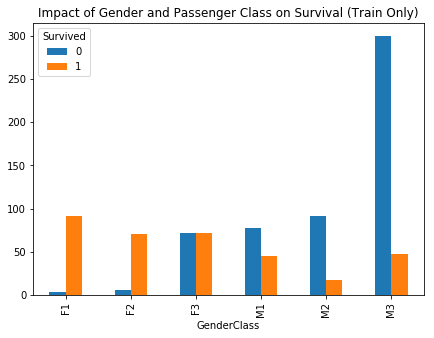

In [15]:
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
df1 = df.copy()
df1['GenderClass'] = df1.apply(lambda x: '{}{}'.format(x.Sex[0:1].upper(),x.Pclass),axis=1)
data = df1.groupby([ 'GenderClass', 'Survived']).size()
data.unstack().plot(kind='bar',title='Impact of Gender and Passenger Class on Survival (Train Only)',ax=ax1);

### Additional Exploration and Missing Value Handling:

#### Age:
* High number of missing values within Age variable.
* There is certainly some information in this variable:
  - High death rate in middle-aged band.
  - Youth and older passengers more likely to survive.

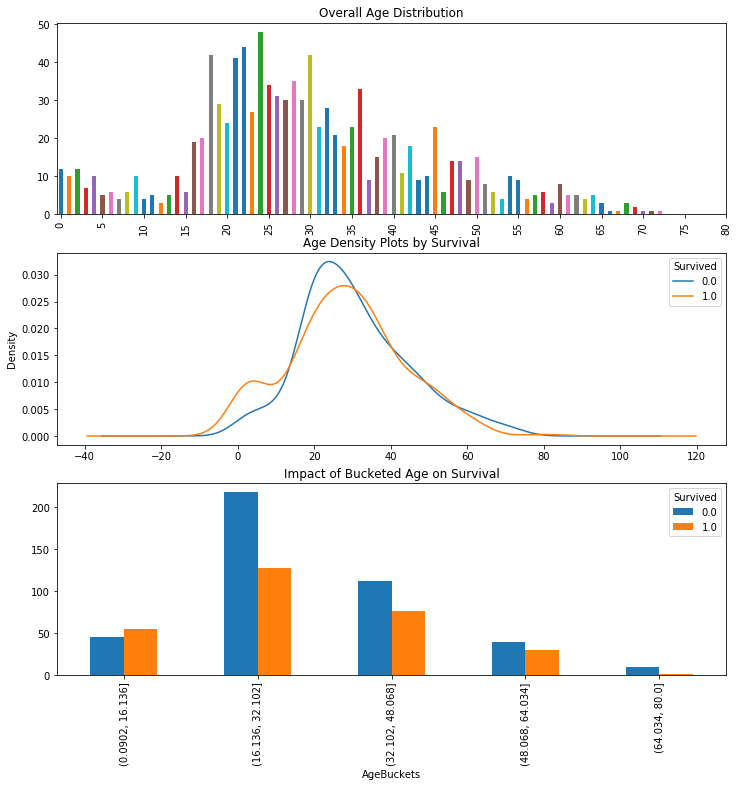

In [16]:
# Bucket Age to convert it into a Categorical Variable:
combined_df['AgeBuckets'] = pd.cut(combined_df.Age,bins=5)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(3,1,1)
data = combined_df.Age[~combined_df.Age.isnull()].apply(int).value_counts().sort_index()
data.plot(kind='bar',title='Overall Age Distribution',ax=ax1)
ax1.set_xticks([i for i in range(0,85,5)]);
ax1.set_xticklabels([i for i in range(0,85,5)]);

ax3 = fig.add_subplot(3,1,2)
data = combined_df[~combined_df.Age.isnull()].groupby(['Survived']).Age
data.plot(kind='density',title='Age Density Plots by Survival',ax=ax3);
ax3.legend(title='Survived');

ax2 = fig.add_subplot(3,1,3)
data = combined_df.groupby(['AgeBuckets','Survived']).size()
data.unstack().plot(kind='bar',title='Impact of Bucketed Age on Survival',ax=ax2);

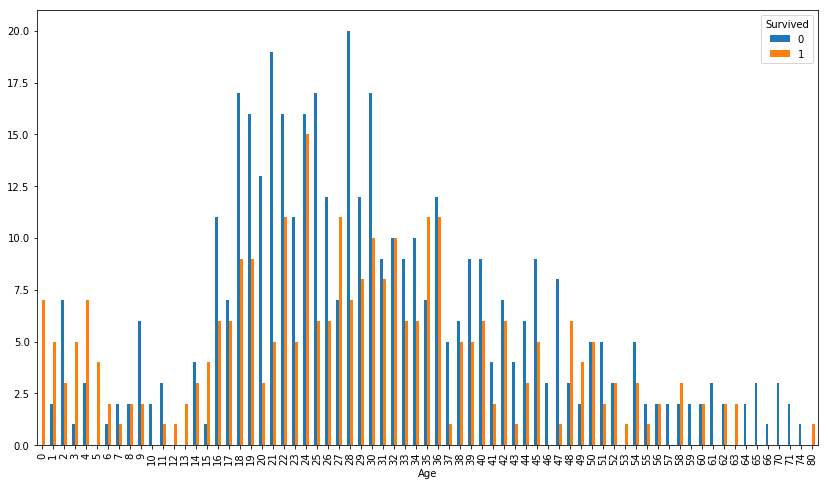

In [17]:
# Rather than trying to impute a large number of missing values,
#  we'll just use the informative middle-aged band as a variable:

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(1,1,1)
data = combined_df[['Age','Survived']].dropna().astype(int).groupby(['Age','Survived']).size()
data.unstack().plot(kind='bar',ax=ax1);


In [20]:
combined_df['age_16_to_34'] = ((combined_df.Age >= 16) & (combined_df.Age <= 34)).apply(int)
combined_df['age_35_to_47'] = ((combined_df.Age >= 35) & (combined_df.Age <= 47)).apply(int)
print(combined_df['age_16_to_34'].head())
print(combined_df['age_35_to_47'].head())

0    1
1    0
2    1
3    0
4    0
Name: age_16_to_34, dtype: int64
0    0
1    1
2    0
3    1
4    1
Name: age_35_to_47, dtype: int64


In [21]:
combined_df.columns
combined_df.drop(['Age','AgeBuckets'],axis=1,inplace=True)
combined_df.columns

Index(['Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Ticket', 'age_16_to_34', 'age_35_to_47'],
      dtype='object')

#### Fare:
* Right skewed distribution.
* Can either normalize, or bin to make this variable more usable in an ML algorithm.

In [22]:
# Impute Fare values for Null and 0 fare's:
combined_df[(combined_df.Fare == 0) | (combined_df.Fare.isnull()) ]

,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,age_16_to_34,age_35_to_47
179,NaN,S,0.0,"Leonard, Mr. Lionel",0,3,male,0,0.0,LINE,0,1
263,B94,S,0.0,"Harrison, Mr. William",0,1,male,0,0.0,112059,0,1
271,NaN,S,0.0,"Tornquist, Mr. William Henry",0,3,male,0,1.0,LINE,1,0
277,NaN,S,0.0,"Parkes, Mr. Francis ""Frank""",0,2,male,0,0.0,239853,0,0
302,NaN,S,0.0,"Johnson, Mr. William Cahoone Jr",0,3,male,0,0.0,LINE,1,0
413,NaN,S,0.0,"Cunningham, Mr. Alfred Fleming",0,2,male,0,0.0,239853,0,0
466,NaN,S,0.0,"Campbell, Mr. William",0,2,male,0,0.0,239853,0,0
481,NaN,S,0.0,"Frost, Mr. Anthony Wood ""Archie""",0,2,male,0,0.0,239854,0,0
597,NaN,S,0.0,"Johnson, Mr. Alfred",0,3,male,0,0.0,LINE,0,0
633,NaN,S,0.0,"Parr, Mr. William Henry Marsh",0,1,male,0,0.0,112052,0,0


In [23]:
# Use Median Pclass Fare to Impute missing values:
pclass_to_fare_lookup = combined_df[~((combined_df.Fare == 0) | (combined_df.Fare.isnull())) ].groupby(['Pclass']).Fare.median()
combined_df.loc[((combined_df.Fare == 0) | (combined_df.Fare.isnull())), 'Fare'] = \
    combined_df['Pclass'].map(dict(pclass_to_fare_lookup))

print('Imputed using the mapping: {}'.format(dict(pclass_to_fare_lookup)))

Imputed using the mapping: {1: 61.3792, 2: 15.05, 3: 8.05}


In [24]:
# Checking that the imputation worked:
combined_df[(combined_df.Fare == 0) | (combined_df.Fare.isnull()) ]

,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,age_16_to_34,age_35_to_47


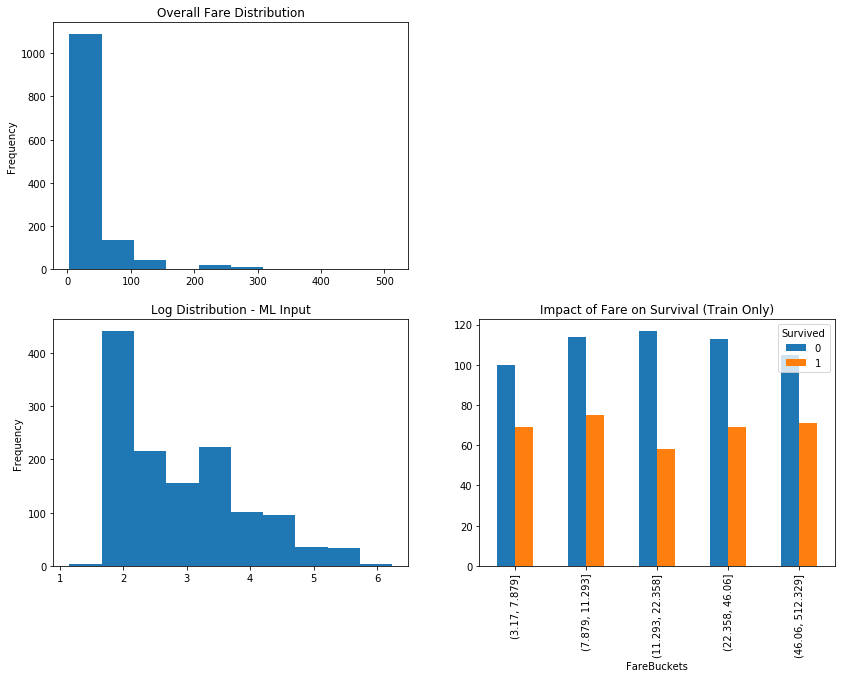

In [25]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
combined_df.Fare.plot(kind='hist',title='Overall Fare Distribution',ax=ax1);

ax3 = fig.add_subplot(2,2,3)
data = np.log(combined_df.Fare)
data.plot(kind='hist',title='Log Distribution - ML Input',ax=ax3);

#df['FareBuckets'] = pd.cut(combined_df.Fare,bins=5)
df['FareBuckets'] = pd.qcut(combined_df.Fare,q=[0, .2, .4, .6, .8, 1.])
ax4 = fig.add_subplot(2,2,4)
data = df.groupby(['FareBuckets', 'Survived']).size()
data.unstack().plot(kind='bar',title='Impact of Fare on Survival (Train Only)',ax=ax4);

#### Other Variables Quick Treatments:
* Drop "Cabin" variable
* Impute missing values for "Embarked"
* Add some additional features related to counting people per Ticket, per Family and per Last Name.

In [26]:
# Drop Cabin -- decided to just leave this one out this go around:
combined_df.drop(['Cabin'],axis=1,inplace=True)
combined_df.columns

Index(['Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Ticket', 'age_16_to_34', 'age_35_to_47'],
      dtype='object')

In [27]:
# Impute Embarked:
combined_df[combined_df.Embarked.isnull()]

,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,age_16_to_34,age_35_to_47
61,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1.0,113572,0,1
829,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1.0,113572,0,0


In [28]:
# Fare by Embarkation point:
pd.DataFrame(combined_df.groupby(['Embarked']).Fare.mean())

,Fare
Embarked,
C,62.336267
Q,12.409012
S,28.001740


In [29]:
# Pclass by Embarkation Point:
pd.DataFrame(combined_df.groupby(['Embarked','Pclass']).size())

0
Embarked Pclass     
C        1       141
         2        28
         3       101
Q        1         3
         2         7
         3       113
S        1       177
         2       242
         3       495

In [30]:
# Fare statistics for the various Embarkation points:
pd.DataFrame(combined_df[combined_df.Pclass==1].groupby(['Embarked']).Fare.describe())

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,141.0,106.84533,96.837527,25.7417,49.5042,76.7292,134.500,512.3292
Q,3.0,90.00000,0.000000,90.0000,90.0000,90.0000,90.000,90.0000
S,177.0,74.57552,60.291367,5.0000,30.5000,52.5542,83.475,263.0000


In [31]:
combined_df.Embarked.fillna('S',inplace=True)
combined_df[combined_df.Embarked.isnull()]

,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,age_16_to_34,age_35_to_47


In [32]:
# Create variable; people_per_ticket (based on "Ticket" input variable):
combined_df = combined_df.merge(pd.DataFrame(combined_df.groupby('Ticket').size(),
                                             columns=['people_per_ticket']),
                                how='left', left_on='Ticket', right_index=True)
combined_df.drop(['Ticket'],axis=1,inplace=True)

In [33]:
# Create variable; people_per_lastname (based on "Name" input variable):
combined_df['Lastname'] = combined_df.Name.apply(lambda x: x.split(',')[0])
combined_df = combined_df.merge(pd.DataFrame(combined_df.groupby('Lastname').size(),
                                             columns=['people_per_lastname']),
                                how='left', left_on='Lastname', right_index=True)
combined_df.drop(['Name','Lastname'],axis=1,inplace=True)

In [34]:
# Create variable; people in family based on "Parch" and "SibSp" input variables:
combined_df['people_in_family'] = combined_df.apply(lambda x: x.Parch+x.SibSp+1,axis=1)
combined_df.drop(['Parch','SibSp'],axis=1,inplace=True)

### Double check that all data is imputed (no missing values):

In [35]:
combined_df.isnull().sum()

Embarked                 0
Fare                     0
Pclass                   0
Sex                      0
Survived               418
age_16_to_34             0
age_35_to_47             0
people_per_ticket        0
people_per_lastname      0
people_in_family         0
dtype: int64

In [36]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Embarked               1309 non-null object
Fare                   1309 non-null float64
Pclass                 1309 non-null int64
Sex                    1309 non-null object
Survived               891 non-null float64
age_16_to_34           1309 non-null int64
age_35_to_47           1309 non-null int64
people_per_ticket      1309 non-null int64
people_per_lastname    1309 non-null int64
people_in_family       1309 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 102.3+ KB


#### Encoding of values for ML input:
* Most models do not accept Text or any other non-numerical data as input.
* The below makes the necessary changes to encode the input features in a format that can be handled by Scikit Learn.

In [37]:
# Panda's get_dummies function is really convenient for encoding categorical variables using one-hot encoding:
combined_df = \
pd.get_dummies(combined_df,
               prefix = {'Sex': 'sex', 'Embarked': 'embarked', 'Pclass': 'pclass'},
               drop_first=True,
               columns = ['Sex', 'Embarked', 'Pclass'])

In [ ]:
# Scikit learn also provides similar functionality, but the marshalling of such values back into the DataFrame adds some complexity:
#encoder = LabelBinarizer()
#combined_df['sex']=encoder.fit_transform(combined_df.Sex)
#combined_df.groupby(['Sex','sex']).size()

In [38]:
# Log of Fare value to normalize range:
combined_df['fareLog'] = np.log(combined_df.Fare)
# Standard Scaled version of Fare:
scaler = StandardScaler()
scaler.fit(combined_df[combined_df.Survived.notnull()].Fare.values.reshape(-1,1))
combined_df['fareScaled'] = scaler.transform(combined_df.Fare.values.reshape(-1,1))

In [39]:
combined_df[combined_df.Survived.notnull()].fareScaled.describe() # --> Mean = 0, Std Deviation = 1

count    8.910000e+02
mean    -6.778466e-17
std      1.000562e+00
min     -5.783102e-01
25%     -4.994001e-01
50%     -3.667908e-01
75%     -2.846075e-02
max      9.673781e+00
Name: fareScaled, dtype: float64

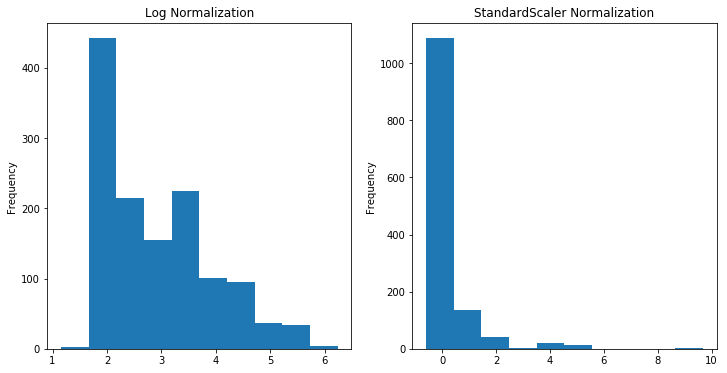

In [40]:
# Quick look at distributions of Fare features:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
combined_df.fareLog.plot(kind='hist', title='Log Normalization', ax=ax1);
combined_df.fareScaled.plot(kind='hist',title='StandardScaler Normalization', ax=ax2);

In [41]:
combined_df.columns

Index(['Fare', 'Survived', 'age_16_to_34', 'age_35_to_47', 'people_per_ticket',
       'people_per_lastname', 'people_in_family', 'sex_male', 'embarked_Q',
       'embarked_S', 'pclass_2', 'pclass_3', 'fareLog', 'fareScaled'],
      dtype='object')

In [43]:
combined_df.drop(['Fare'],axis=1,inplace=True)

In [44]:
combined_df.columns

Index(['Survived', 'age_16_to_34', 'age_35_to_47', 'people_per_ticket',
       'people_per_lastname', 'people_in_family', 'sex_male', 'embarked_Q',
       'embarked_S', 'pclass_2', 'pclass_3', 'fareLog', 'fareScaled'],
      dtype='object')

## Prep for Model Building:

In [45]:
# Prep Training, Test, Validation Datasets:
X = combined_df[combined_df.Survived.notnull()].drop(['Survived'],axis=1)
y = combined_df[combined_df.Survived.notnull()]['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size = 0.6, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

X_train.head()

(623, 12)
(160, 12)
(108, 12)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,age_16_to_34,age_35_to_47,people_per_ticket,people_per_lastname,people_in_family,sex_male,embarked_Q,embarked_S,pclass_2,pclass_3,fareLog,fareScaled
445,0,0,3,3,3,1,0,1,0,0,4.404990,0.991739
650,0,0,1,1,1,1,0,1,0,1,2.066331,-0.499989
172,0,0,3,6,3,0,0,1,0,1,2.409941,-0.434693
450,0,1,4,4,4,1,0,1,1,0,3.323236,-0.099555
314,0,1,3,4,3,1,0,1,1,0,3.267666,-0.129809


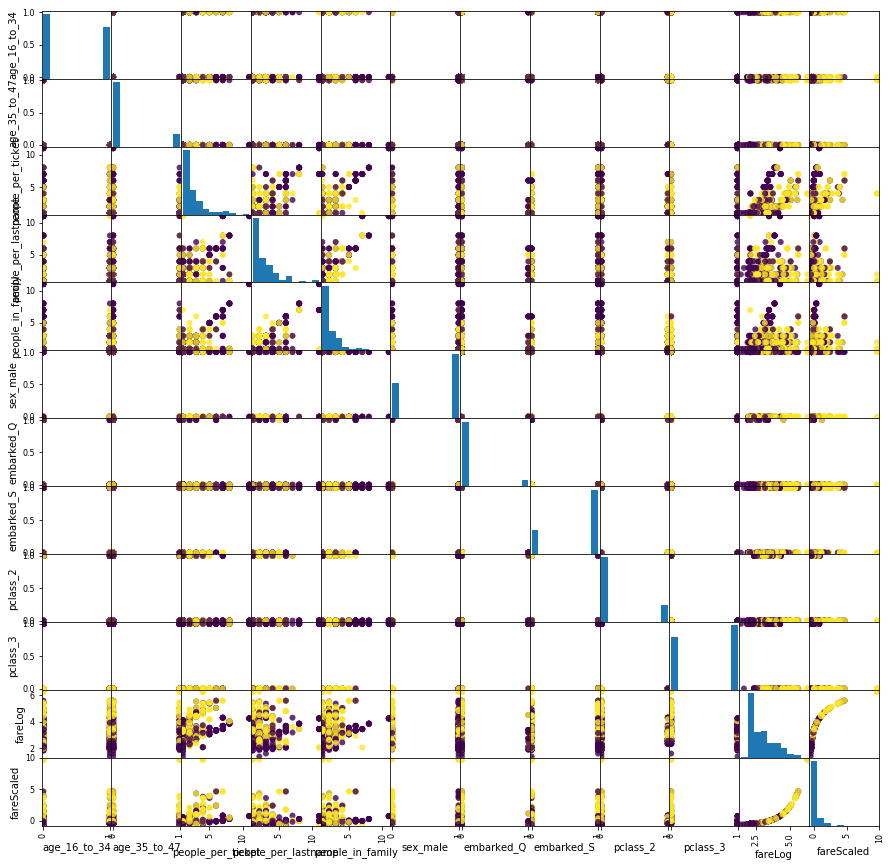

In [46]:
pd.plotting.scatter_matrix(X, c=y, figsize=(15,15), alpha=0.8, marker='o');

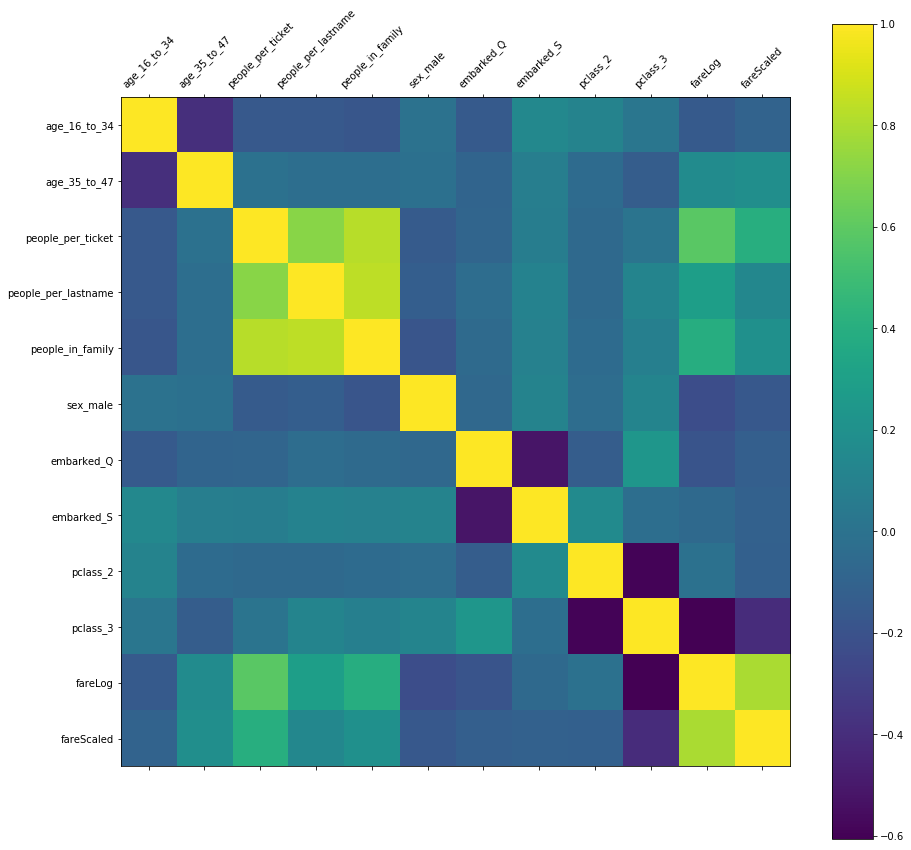

In [47]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
c = X_train.corr()
mat_ax = ax.matshow(c);
fig.colorbar(mat_ax)
plt.xticks(range(len(c.columns)), c.columns, rotation=45);
plt.yticks(range(len(c.columns)), c.columns);

## Model Creation:

#### Quick Random Forest model:

In [48]:
rf = RandomForestClassifier(n_estimators=200, max_depth=4, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [49]:
# Confusion Matrix:
y_actual = y_test
y_pred = rf.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_actual, y_pred)))
print("F1 Score: {}".format(f1_score(y_actual, y_pred)))
print("Matthew's Corr Coef: {}".format(matthews_corrcoef(y_actual, y_pred)))

pd.DataFrame(confusion_matrix(y_actual, y_pred),
             columns=['Pred_Died','Pred_Survived'],
             index=['Actual_Died','Actual_Survived'])

Accuracy: 0.80625
F1 Score: 0.7596899224806202
Matthew's Corr Coef: 0.6218709510394705


,Pred_Died,Pred_Survived
Actual_Died,80,6
Actual_Survived,25,49


### Exercise #4:
<span style="color:blue">
Let's use Scikit Learn to build another model (named as "svm") - this time a Support Vector Machine. Remember that the workflow for Scikit Learn is: `Instatiate model -- Fit to data -- Predict`
<ul>
    <li>Instantiate model class: SVC()</li>
    <li>Fit to training data</li>
    <li>Evaluate using confusion matrix / performance metrics</li>
</ul>
</span>
<div class="panel-group" id="accordion-5">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-5" href="#collapse1-5">Hints</a>
    </h4>
    </div>
    <div id="collapse1-5" class="panel-collapse collapse">
      <div class="panel-body">
Fitting to the training data can be done using: `svm.fit()` function - the data to fit with is: X_train, y_train.
<br><br>
To evaluate the model, we compare the y_test data (actual ground truth) against the predicted data; obtained using `svm.predict()` function.
    </div>
    </div>
</div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-5" href="#collapse2-5">Solution</a>
    </h4>
    </div>
    <div id="collapse2-5" class="panel-collapse collapse">
      <div class="panel-body">
One possible solution:
<br><br>
# Model creation and fitting:<br>
`svm = SVC()`<br>
`svm.fit(X_train,y_train)`<br>
<br>
# Model evaluation:<br>
`y_actual = y_test`<br>
`y_pred = svm.predict(X_test)`
      </div>
    </div>
</div>
</div>

In [50]:
# Model creation and fitting:
svm = SVC()
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
# Check prediction accuracy using test set:
y_actual = y_test
y_pred = svm.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_actual, y_pred)))
print("F1 Score: {}".format(f1_score(y_actual, y_pred)))
print("Matthew's Corr Coef: {}".format(matthews_corrcoef(y_actual, y_pred)))

pd.DataFrame(confusion_matrix(y_actual, y_pred),
             columns=['Pred_Died','Pred_Survived'],
             index=['Actual_Died','Actual_Survived'])

Accuracy: 0.825
F1 Score: 0.7971014492753623
Matthew's Corr Coef: 0.6499246519528296


,Pred_Died,Pred_Survived
Actual_Died,77,9
Actual_Survived,19,55


_Questions:_
* _How did the SVM model compare with the Random Forest model?_

#### Using Cross Validation:
* Applies fit on non-test folds of data and evaluates accuracy on the last fold of the data.
* With cv=5 it's fitting the model 5 times to 4/5 of the data and then evaluating on the last 1/5th.
* Using "accuracy" scoring by default, but can be changed by passing a different value to the "scoring" parameter.

In [52]:
# For the Random Forest model:
res = cross_val_score(rf,X,y,cv=5)
print(res)
print("Average Validation Score: {}".format(res.mean()))

[0.72067039 0.81564246 0.83146067 0.78089888 0.81355932]
Average Validation Score: 0.7924463443515415


In [53]:
# For the Support Vector Machine model:
res = cross_val_score(svm,X,y,cv=5)
print(res)
print("Average Validation Score: {}".format(res.mean()))

[0.80446927 0.7877095  0.80337079 0.78651685 0.82485876]
Average Validation Score: 0.8013850336922612


### Exercise #5:
<span style="color:blue">
Let's use `cross_val_score` to evaluate quickly how a couple of other models will do at a high-level on this problem.
* Let's evaluate `KNeighborsClassifier` (with parameter `n_neighbors`).
* Also let's see how `LogisticRegression` model will do.
</span>
<div class="panel-group" id="accordion-7">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-7" href="#collapse1-7">Hints</a>
    </h4>
    </div>
    <div id="collapse1-7" class="panel-collapse collapse">
      <div class="panel-body">
Similar code to the above, except that we should instantiate `KNeighborsClassifier(n_neighbors=?)` and `LogisticRegression()` models (one at a time, or in a loop).
    </div>
    </div>
</div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-7" href="#collapse2-7">Solution</a>
    </h4>
    </div>
    <div id="collapse2-7" class="panel-collapse collapse">
      <div class="panel-body">
One possible solution:
<br><br>
for (name, modl) in [ ('KNeighbors', KNeighborsClassifier(n_neighbors=11)), ('LogisticRegression', LogisticRegression()) ]:
<p style="margin-left: 40px">print("{}:".format(name))</p>
<p style="margin-left: 40px">res = cross_val_score(modl,X,y,cv=5)</p>
<p style="margin-left: 40px">print(res)</p>
<p style="margin-left: 40px">print("Average Validation Score: {}".format(res.mean()))</p>
<p style="margin-left: 40px">print()</p>
      </div>
    </div>
</div>
</div>


In [54]:
# KNeighborsClassifier, LogisticRegression cross validation scores:
for (name, modl) in [ ('KNeighbors', KNeighborsClassifier(n_neighbors=11)),
                     ('LogisticRegression', LogisticRegression()) ]:
    print("{}:".format(name))
    res = cross_val_score(modl,X,y,cv=5)
    print(res)
    print("Average Validation Score: {}".format(res.mean()))
    print()

KNeighbors:
[0.72067039 0.74860335 0.79213483 0.80898876 0.75706215]
Average Validation Score: 0.7654918970830067

LogisticRegression:
[0.7877095  0.81005587 0.7752809  0.78651685 0.8079096 ]
Average Validation Score: 0.7934945440914509



#### Using Grid Search to find optimal model parameters:

In [55]:
# For the 
model_rf = RandomForestClassifier(random_state=42)
params = {
    'n_estimators' : [100, 150, 200],
    'max_depth'    : [3, 5, 7],
    'criterion'    : ('gini', 'entropy'),
    'max_features' : [5, 7, 9]
}

gs_rf = GridSearchCV(model_rf, params, cv=5)
gs_rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200], 'max_depth': [3, 5, 7], 'criterion': ('gini', 'entropy'), 'max_features': [5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
print(gs_rf.best_estimator_)
gs_rf.best_score_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


0.8138041733547352

In [57]:
# Confusion Matrix:
y_actual = y_test
y_pred = gs_rf.best_estimator_.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_actual, y_pred)))
print("F1 Score: {}".format(f1_score(y_actual, y_pred)))
print("Matthew's Corr Coef: {}".format(matthews_corrcoef(y_actual, y_pred)))

pd.DataFrame(confusion_matrix(y_actual, y_pred),
             columns=['Pred_Died','Pred_Survived'],
             index=['Actual_Died','Actual_Survived'])

Accuracy: 0.825
F1 Score: 0.7812500000000001
Matthew's Corr Coef: 0.6634056573913786


,Pred_Died,Pred_Survived
Actual_Died,82,4
Actual_Survived,24,50


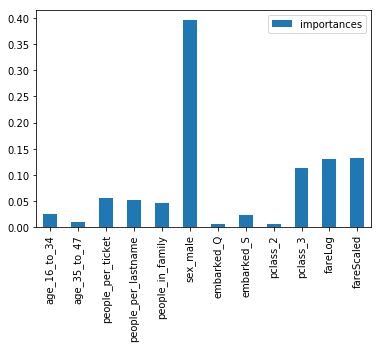

In [58]:
# Useful functionality of Random Forest classifier - provides feature importance ranking:
pd.DataFrame({'importances': gs_rf.best_estimator_.feature_importances_ },index=X_train.columns).plot(kind='bar');

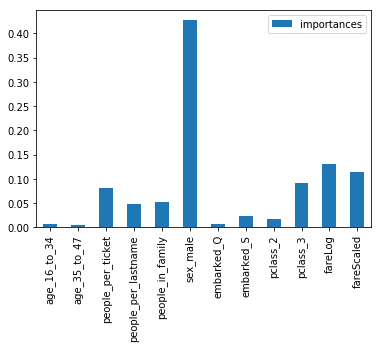

In [59]:
# Slightly different importances for the un-optimized Random Forest Model:
pd.DataFrame({'importances': rf.feature_importances_ },index=X_train.columns).plot(kind='bar');

In [60]:
# Another grid-search example removing some of the correlated features:
model_rf = RandomForestClassifier(random_state=42)
params = {
    'n_estimators' : [100, 150, 200],
    'max_depth'    : [3, 5, 7],
    'criterion'    : ('gini', 'entropy'),
    'max_features' : [5, 7, 9]
}

gs = GridSearchCV(model_rf, params, cv=5)
gs.fit(X_train.drop(['fareScaled','people_per_lastname'],axis=1),y_train)

# Evaluation using Confusion Matrix and Evaluation Metrics:
y_actual = y_test
y_pred = gs.best_estimator_.predict(X_test.drop(['fareScaled','people_per_lastname'],axis=1))

print("Accuracy: {}".format(accuracy_score(y_actual, y_pred)))
print("F1 Score: {}".format(f1_score(y_actual, y_pred)))
print("Matthew's Corr Coef: {}".format(matthews_corrcoef(y_actual, y_pred)))

pd.DataFrame(confusion_matrix(y_actual, y_pred),
             columns=['Pred_Died','Pred_Survived'],
             index=['Actual_Died','Actual_Survived'])

Accuracy: 0.825
F1 Score: 0.7846153846153845
Matthew's Corr Coef: 0.6596566356880996


,Pred_Died,Pred_Survived
Actual_Died,81,5
Actual_Survived,23,51


### Exercise #6:
<span style="color:blue">
Let's do a grid search to find the optimal parameters for the SVC (Support Vector Classifier) model.
<ul>
    <li>Use Random Forest Grid Search as a guideline (from above).</li>
    <li>Let's optimize the following parameters: C, kernel, degree.</li>
    <li>See whether we can beat the evaluation metrics we got from the original model.</li>
</ul>
</span>
<div class="panel-group" id="accordion-6">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-6" href="#collapse1-6">Solution</a>
    </h4>
    </div>
    <div id="collapse1-6" class="panel-collapse collapse">
      <div class="panel-body">
Possible solution:<br>
<br>
model_svm = SVC(random_state=42)<br>
params = {<br>
    'C'            : [0.1, 1, 10],<br>
    'kernel'       : ('rbf', 'poly'),<br>
    'degree'       : [2, 3, 4]<br>
}<br>
<br>
gs_svm = GridSearchCV(model_svm, params, cv=5)<br>
gs_svm.fit(X_train,y_train)<br>
<br>
# Evaluation using Confusion Matrix and Evaluation Metrics:<br>
y_actual = y_test<br>
y_pred = gs_svm.best\_estimator\_.predict(X_test)<br>
<br>
print("Accuracy: {}".format(accuracy_score(y_actual, y_pred)))<br>
print("F1 Score: {}".format(f1_score(y_actual, y_pred)))<br>
print("Matthew's Corr Coef: {}".format(matthews_corrcoef(y_actual, y_pred)))<br>
<br>
pd.DataFrame(confusion_matrix(y_actual, y_pred),<br>
             columns=['Pred_Died','Pred_Survived'],<br>
             index=['Actual_Died','Actual_Survived'])
    </div>
    </div>
</div>
</div>

In [61]:
# SVM Grid Search:
model_svm = SVC(random_state=42)
params = {
'C' : [0.1, 1, 10],
'kernel' : ('rbf', 'poly'),
'degree' : [2, 3, 4]
}

gs_svm = GridSearchCV(model_svm, params, cv=5)
gs_svm.fit(X_train,y_train)

# Evaluation using Confusion Matrix and Evaluation Metrics:
y_actual = y_test
y_pred = gs_svm.best_estimator_.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_actual, y_pred)))
print("F1 Score: {}".format(f1_score(y_actual, y_pred)))
print("Matthew's Corr Coef: {}".format(matthews_corrcoef(y_actual, y_pred)))

pd.DataFrame(confusion_matrix(y_actual, y_pred),
columns=['Pred_Died','Pred_Survived'],
index=['Actual_Died','Actual_Survived'])

Accuracy: 0.8375
F1 Score: 0.8088235294117647
Matthew's Corr Coef: 0.677351964062207


,Pred_Died,Pred_Survived
Actual_Died,79,7
Actual_Survived,19,55


## Kaggle Submission Generation:

In [64]:
X_blind = combined_df[combined_df.Survived.isnull()].drop(['Survived'],axis=1)
y_blind = gs_rf.best_estimator_.predict(X_blind)

In [65]:
pd.DataFrame({'PassengerId' : X_blind.index.values+1, 'Survived' : y_blind.astype(int)}).to_csv('rf_submission_gs1.csv', index=False)

In [66]:
! ls rf_submission_gs1.csv
! head -5 rf_submission_gs1.csv

rf_submission_gs1.csv
PassengerId,Survived
892,0
893,1
894,0
895,0


In [ ]:
# Kaggle Public Leaderboard Score: 0.78947 (~ 3% jump from gender-only submission)